In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
!pip install seaborn
import seaborn as sns # Import Seaborn and give it the alias 'sns'

In [ ]:
# Split dataset in dependent/independent variables
X = df_start.iloc[:, :-1].values
y = df_start.iloc[:, -1].values

In [ ]:
# Get dataset
df_start = pd.read_csv('/content/50_Startups.csv')
df_start.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

<ipython-input-32-09ff1edfb7fb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_start['Profit'])


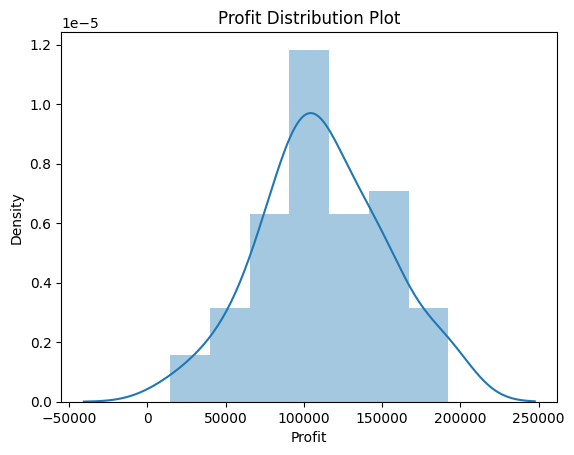

In [ ]:
# Data distribution
plt.title('Profit Distribution Plot')
sns.distplot(df_start['Profit'])
plt.show()

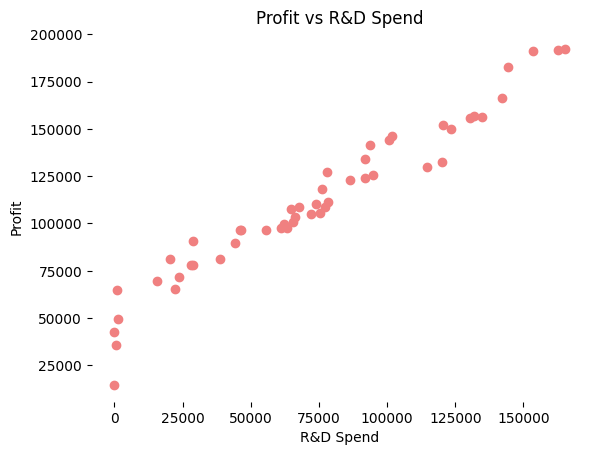

In [ ]:
# Relationship between Profit and R&D Spend
plt.scatter(df_start['R&D Spend'], df_start['Profit'], color = 'lightcoral')
plt.title('Profit vs R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.box(False)
plt.show()

In [ ]:
# Split dataset in dependent/independent variables
X = df_start.iloc[:, :-1].values
y = df_start.iloc[:, -1].values

In [ ]:
# One-hot encoding of categorical data
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [3])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

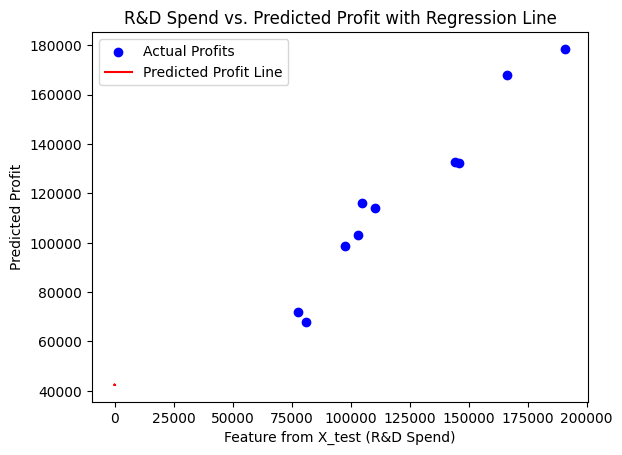

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'y_test' represents the actual profit values
plt.scatter(y_test, y_pred, color='blue', label='Actual Profits')  # Add label for actual profits

# Get the coefficients and intercept from the trained model
coefficients = regressor.coef_
intercept = regressor.intercept_

# Calculate the predicted profit values using the coefficients and intercept
# This line represents the regression line
predicted_profit_line = coefficients[0] * X_test[:, 0] + intercept

# Plot the regression line
plt.plot(X_test[:, 0], predicted_profit_line, color='red', label='Predicted Profit Line')  # Add label for predicted line

plt.xlabel("Feature from X_test (R&D Spend)")  # Assuming the first column is R&D Spend
plt.ylabel("Predicted Profit")
plt.title("R&D Spend vs. Predicted Profit with Regression Line")
plt.legend()  # Show labels for actual and predicted lines
plt.show()

In [ ]:
# Predict result
y_pred = regressor.predict(X_test)

In [ ]:
# Compare predicted result with actual value
np.set_printoptions(precision = 2)
result = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)
result

array([[103015.2 , 103282.38],
       [132582.28, 144259.4 ],
       [132447.74, 146121.95],
       [ 71976.1 ,  77798.83],
       [178537.48, 191050.39],
       [116161.24, 105008.31],
       [ 67851.69,  81229.06],
       [ 98791.73,  97483.56],
       [113969.44, 110352.25],
       [167921.07, 166187.94]])

In [ ]:
# Regressor coefficients and intercept
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]
Intercept: 42467.52924853278
